In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ipl = pd.read_csv("Downloads/ipl_2022_dataset.csv")
ipl.head()

Unnamed: 0           Player  Base Price         TYPE  COST IN ₹ (CR.)  \
0           0      Rashid Khan  Draft Pick       BOWLER             15.0   
1           1    Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0   
2           2  Lockie Ferguson        2 Cr       BOWLER             10.0   
3           3    Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0   
4           4     Shubman Gill  Draft Pick       BATTER              8.0   

   Cost IN $ (000) 2021 Squad            Team  
0           1950.0        SRH  Gujarat Titans  
1           1950.0         MI  Gujarat Titans  
2           1300.0        KKR  Gujarat Titans  
3           1170.0         RR  Gujarat Titans  
4           1040.0        KKR  Gujarat Titans

In [3]:
ipl = ipl.drop("Unnamed: 0",axis=1)
ipl.head()

Player  Base Price         TYPE  COST IN ₹ (CR.)  Cost IN $ (000)  \
0      Rashid Khan  Draft Pick       BOWLER             15.0           1950.0   
1    Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0           1950.0   
2  Lockie Ferguson        2 Cr       BOWLER             10.0           1300.0   
3    Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0           1170.0   
4     Shubman Gill  Draft Pick       BATTER              8.0           1040.0   

  2021 Squad            Team  
0        SRH  Gujarat Titans  
1         MI  Gujarat Titans  
2        KKR  Gujarat Titans  
3         RR  Gujarat Titans  
4        KKR  Gujarat Titans

In [4]:
ipl.shape

(633, 7)

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


In [6]:
ipl.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [7]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [8]:
ipl[ipl["COST IN ₹ (CR.)"].isnull()]

Player Base Price         TYPE  COST IN ₹ (CR.)  \
237            Suresh Raina       2 Cr       BATTER              NaN   
238             Steve Smith       2 Cr       BATTER              NaN   
239         Shakib Al Hasan       2 Cr  ALL-ROUNDER              NaN   
240             Amit Mishra     1.5 Cr       BOWLER              NaN   
241             Adil Rashid       2 Cr       BOWLER              NaN   
..                      ...        ...          ...              ...   
628            Sairaj Patil    20 Lakh       BATTER              NaN   
629              Monu Singh    20 Lakh       BOWLER              NaN   
630  Nivethan Radhakrishnan    20 Lakh       BOWLER              NaN   
631            Lance Morris    20 Lakh       BOWLER              NaN   
632            Aaron Hardie    20 Lakh  ALL-ROUNDER              NaN   

     Cost IN $ (000) 2021 Squad    Team  
237              NaN        CSK  Unsold  
238              NaN         DC  Unsold  
239              NaN        KKR  Unsold  
240              NaN         DC  Unsold  
241              NaN       PBKS  Unsold  
..               ...        ...     ...  
628              NaN        NaN  Unsold  
629              NaN        NaN  Unsold  
630              NaN        NaN  Unsold  
631              NaN        NaN  Unsold  
632              NaN        NaN  Unsold  

[396 rows x 7 columns]

In [9]:
ipl["COST IN ₹ (CR.)"]=ipl["COST IN ₹ (CR.)"].fillna(0)
ipl["Cost IN $ (000)"]=ipl["Cost IN $ (000)"].fillna(0)

In [10]:
ipl[ipl["2021 Squad"].isnull()]

Player Base Price          TYPE  COST IN ₹ (CR.)  \
6                Yash Dayal    20 Lakh        BOWLER              3.2   
9       Abhinav Sadarangani    20 Lakh        BATTER              2.6   
10             Matthew Wade       2 Cr  WICKETKEEPER              2.4   
11           Alzarri Joseph    75 Lakh        BOWLER              2.4   
17              Varun Aaron    50 Lakh        BOWLER              0.5   
..                      ...        ...           ...              ...   
628            Sairaj Patil    20 Lakh        BATTER              0.0   
629              Monu Singh    20 Lakh        BOWLER              0.0   
630  Nivethan Radhakrishnan    20 Lakh        BOWLER              0.0   
631            Lance Morris    20 Lakh        BOWLER              0.0   
632            Aaron Hardie    20 Lakh   ALL-ROUNDER              0.0   

     Cost IN $ (000) 2021 Squad            Team  
6              416.0        NaN  Gujarat Titans  
9              338.0        NaN  Gujarat Titans  
10             312.0        NaN  Gujarat Titans  
11             312.0        NaN  Gujarat Titans  
17              65.0        NaN  Gujarat Titans  
..               ...        ...             ...  
628              0.0        NaN          Unsold  
629              0.0        NaN          Unsold  
630              0.0        NaN          Unsold  
631              0.0        NaN          Unsold  
632              0.0        NaN          Unsold  

[434 rows x 7 columns]

In [11]:
ipl["2021 Squad"]=ipl["2021 Squad"].fillna("Not Participated")

In [12]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [13]:
teams=ipl[ipl["COST IN ₹ (CR.)"]>0]["Team"].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [14]:
ipl["Status"]=ipl["Team"].replace(teams,"Sold")

In [15]:
ipl

Player  Base Price         TYPE  COST IN ₹ (CR.)  \
0               Rashid Khan  Draft Pick       BOWLER             15.0   
1             Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0   
2           Lockie Ferguson        2 Cr       BOWLER             10.0   
3             Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0   
4              Shubman Gill  Draft Pick       BATTER              8.0   
..                      ...         ...          ...              ...   
628            Sairaj Patil     20 Lakh       BATTER              0.0   
629              Monu Singh     20 Lakh       BOWLER              0.0   
630  Nivethan Radhakrishnan     20 Lakh       BOWLER              0.0   
631            Lance Morris     20 Lakh       BOWLER              0.0   
632            Aaron Hardie     20 Lakh  ALL-ROUNDER              0.0   

     Cost IN $ (000)        2021 Squad            Team  Status  
0             1950.0               SRH  Gujarat Titans    Sold  
1             1950.0                MI  Gujarat Titans    Sold  
2             1300.0               KKR  Gujarat Titans    Sold  
3             1170.0                RR  Gujarat Titans    Sold  
4             1040.0               KKR  Gujarat Titans    Sold  
..               ...               ...             ...     ...  
628              0.0  Not Participated          Unsold  Unsold  
629              0.0  Not Participated          Unsold  Unsold  
630              0.0  Not Participated          Unsold  Unsold  
631              0.0  Not Participated          Unsold  Unsold  
632              0.0  Not Participated          Unsold  Unsold  

[633 rows x 8 columns]

In [16]:
ipl[ipl["Player"].duplicated(keep=False)]

Player Base Price         TYPE  COST IN ₹ (CR.)  Cost IN $ (000)  \
62     Lalit Yadav    20 Lakh  ALL-ROUNDER             0.65             84.5   
240    Amit Mishra     1.5 Cr       BOWLER             0.00              0.0   
499    Amit Mishra    20 Lakh       BOWLER             0.00              0.0   
518  Shivam Sharma    20 Lakh  ALL-ROUNDER             0.00              0.0   
530    Lalit Yadav    20 Lakh       BOWLER             0.00              0.0   
537  Shubham Singh    20 Lakh  ALL-ROUNDER             0.00              0.0   
544  Shubham Singh    20 Lakh       BOWLER             0.00              0.0   
569  Shivam Sharma    20 Lakh  ALL-ROUNDER             0.00              0.0   

           2021 Squad            Team  Status  
62                 DC  Delhi Capitals    Sold  
240                DC          Unsold  Unsold  
499  Not Participated          Unsold  Unsold  
518  Not Participated          Unsold  Unsold  
530  Not Participated          Unsold  Unsold  
537  Not Participated          Unsold  Unsold  
544  Not Participated          Unsold  Unsold  
569  Not Participated          Unsold  Unsold

In [17]:
# How many players participated in ipl 2022?

ipl.shape[0]

633

In [18]:
# How many different types of players have participated?

types=ipl["TYPE"].value_counts()
types.reset_index()

index  TYPE
0   ALL-ROUNDER   242
1        BOWLER   215
2        BATTER   112
3  WICKETKEEPER    64

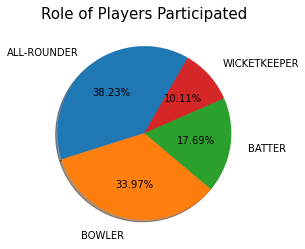

In [19]:
plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct="%1.2f%%", shadow=True, startangle=60)
plt.title("Role of Players Participated", fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


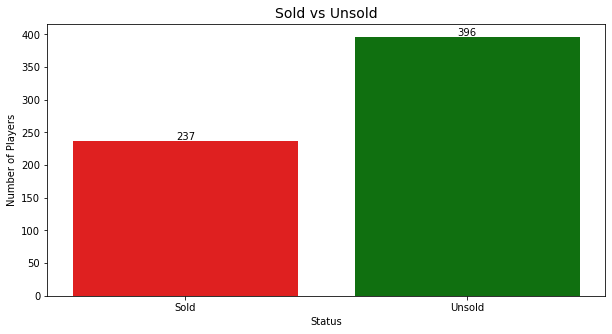

In [20]:
# Players sold and unsold using a bar graph.

plt.figure(figsize=(10,5))
fig=sns.countplot(ipl["Status"], palette=["red","green"])
plt.xlabel("Status")
plt.ylabel("Number of Players")
plt.title("Sold vs Unsold", fontsize=14)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), ".0f"), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = "center", va = "center",
    xytext = (0, 4), textcoords = "offset points")

In [21]:
ipl.groupby("Status")["Player"].count()

Status
Sold      237
Unsold    396
Name: Player, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


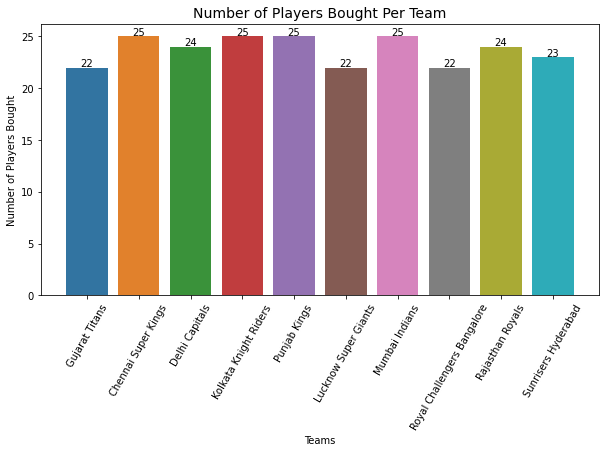

In [22]:
# Total number of players bought by each team.

plt.figure(figsize=(10,5))
fig=sns.countplot(ipl[ipl["Team"]!="Unsold"]["Team"])
plt.xlabel("Teams")
plt.ylabel("Number of Players Bought")
plt.title("Number of Players Bought Per Team", fontsize=14)
plt.xticks(rotation=60)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), ".0f"), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = "center", va = "center",
    xytext = (0, 4), textcoords = "offset points")

In [23]:
ipl.groupby("Team")["Player"].count()

Team
Chennai Super Kings             25
Delhi Capitals                  24
Gujarat Titans                  22
Kolkata Knight Riders           25
Lucknow Super Giants            22
Mumbai Indians                  25
Punjab Kings                    25
Rajasthan Royals                24
Royal Challengers Bangalore     22
Sunrisers Hyderabad             23
Unsold                         396
Name: Player, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


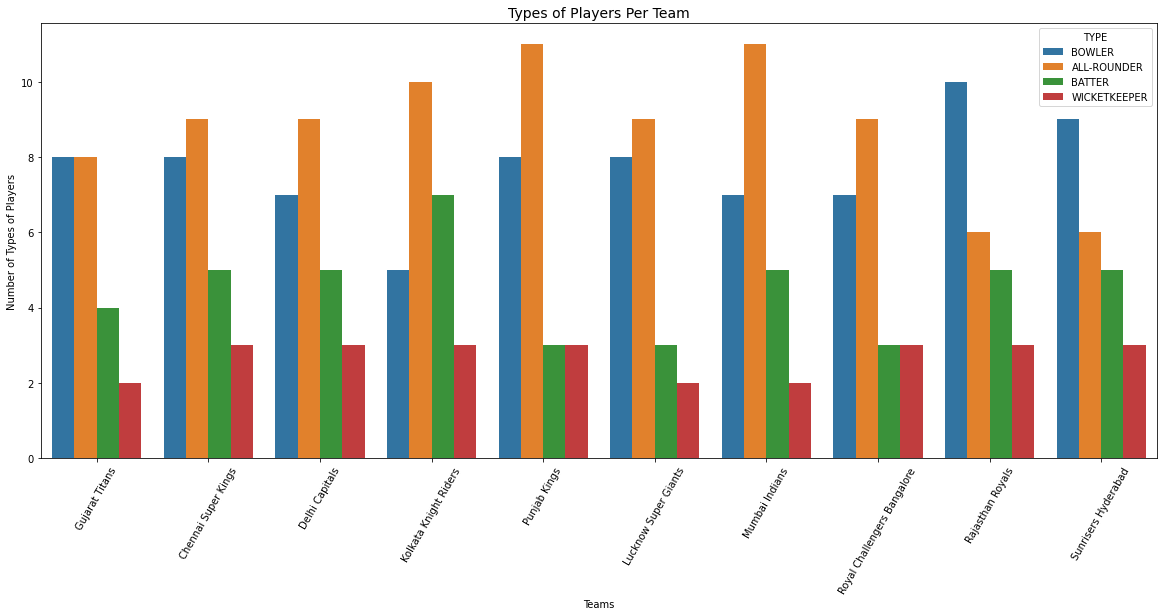

In [24]:
# Types of players bought by each team.

plt.figure(figsize=(20,8))
fig=sns.countplot(ipl[ipl["Team"]!="Unsold"]["Team"], hue=ipl["TYPE"])
plt.xlabel("Teams")
plt.ylabel("Number of Types of Players")
plt.title("Types of Players Per Team", fontsize=14)
plt.xticks(rotation=60)
plt.show()

In [25]:
ipl["retention"]=ipl["Base Price"]

In [26]:
ipl["retention"].replace(["2 Cr", "40 Lakh", "20 Lakh", "1 Cr", "75 Lakh", "50 Lakh",
                "30 Lakh", "1.5 Cr"], "From Auction", inplace=True)

In [27]:
ipl["Base Price"].replace("Draft Pick", 0, inplace=True)

In [28]:
ipl["base_price_unit"]=ipl["Base Price"].apply(lambda x:str(x).split(" ")[-1])
ipl["base_price"]=ipl["Base Price"].apply(lambda x:str(x).split(" ")[0])

In [29]:
ipl["base_price"].replace("Retained", 0, inplace=True)

In [30]:
# Total Players Retained and Brought.

ipl.groupby(["Team", "retention"])["Player"].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

In [31]:
# Highest amount spent by each team on a single player.

ipl[ipl["retention"]=="From Auction"].groupby("Team")["COST IN ₹ (CR.)"].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64